In [305]:
import numpy as np
import nmrglue as nmrglue
import matplotlib.pyplot as plt
import pandas as pd

In [306]:
# Important Acqus Parameters
AQ=2.2 # Acquistion time (s)
SWH=2000 #Spectral Width [Hz]
SF=202.4765750 #Spectrometer frequency [Mhz]
SFO1=202.4752000 #Transmitter frequency [Mhz]

## Next we will process data ourselves and try to figure out how Bruker auto-processes

###### Apply exponential apodiziation, and ls shift. (Zero filling seems unneccesary because of exponential apodization)

In [307]:
#phase shift
all_data = nmrglue.bruker.read(r"C:\Users\donny\Desktop\thesis files\2025_02_19-20\1000_ns1_11\12")[1]
all_data=all_data[0]
#all_data=all_data[0]+all_data[1]+all_data[2]
all_data = np.array(all_data)
#print(all_data.shape)
#all_data=nmrglue.proc_base.ps(all_data, p0=146.320, p1=-115.469)
all_data=nmrglue.proc_base.ps(all_data, p0=90-31, p1=0)
time = np.linspace(0, AQ, len(all_data.real))

In [308]:
# Apply exponential apodization
#apodized_data = nmrglue.proc_base.em(all_data, .0003)
#*********this function can only take real part and not full complex part. Do we want to edit this way?

#*******TURNING THIS OFF FOR NOW
apodized_data = all_data
#*******

In [309]:
ls_and_apodized_data = nmrglue.proc_base.ls(apodized_data, 63)
"""
# Plot the results
#plt.figure(figsize=(10, 6))
time=np.linspace(0, AQ, len(all_data.real))
plt.xlabel("Time (s)", fontsize=18)
plt.ylabel("Amplitude", fontsize=18)
plt.title("Exponential Apodization on FID", fontsize=26)
plt.legend()
plt.grid(True)
plt.axvline(x=0, color='red', linestyle='--', label="x = 0")
plt.plot(time, apodized_data, label="original data")
plt.plot(time, ls_and_apodized_data, label="ls data", color = "Black")
plt.show()
"""


'\n# Plot the results\n#plt.figure(figsize=(10, 6))\ntime=np.linspace(0, AQ, len(all_data.real))\nplt.xlabel("Time (s)", fontsize=18)\nplt.ylabel("Amplitude", fontsize=18)\nplt.title("Exponential Apodization on FID", fontsize=26)\nplt.legend()\nplt.grid(True)\nplt.axvline(x=0, color=\'red\', linestyle=\'--\', label="x = 0")\nplt.plot(time, apodized_data, label="original data")\nplt.plot(time, ls_and_apodized_data, label="ls data", color = "Black")\nplt.show()\n'

C:\Users\donny\AppData\Local\Temp\ipykernel_23428\3160535822.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


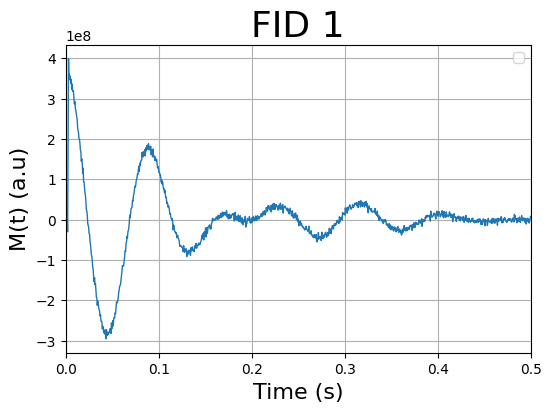

In [310]:
# Plot the results
plt.figure(figsize=(6, 4))
time=np.linspace(0, AQ, len(all_data.real))
plt.plot(time, ls_and_apodized_data, linewidth=1)
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("M(t) (a.u)", fontsize=16)
plt.title("FID 1", fontsize=26)
#plt.title("Sum of FID's", fontsize=22)
plt.legend()
plt.grid(True)
plt.xlim(0,.5)
#plt.axvline(x=0, color='red', linestyle='--', label="x = 0")
plt.show()


C:\Users\donny\AppData\Local\Temp\ipykernel_23428\218859380.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


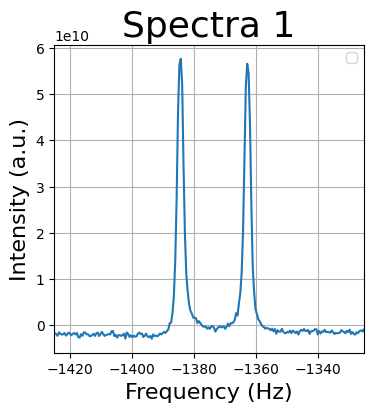

In [311]:
spectrum = nmrglue.proc_base.fft(ls_and_apodized_data) 
#spectrum = nmrglue.proc_base.fft(all_data)

# Create a frequency axis
n = len(all_data.real)
freq = np.linspace(-SWH / 2-(SF-SFO1)*10**6, SWH / 2-(SF-SFO1)*10**6, n)
#***I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.

plt.figure(figsize=(4, 4))
plt.plot(freq, np.real(spectrum))
plt.xlabel("Frequency (Hz)", fontsize=16)
plt.ylabel("Intensity (a.u.)", fontsize=16)
plt.title("Spectra 1", fontsize=26)
#plt.title("Sum of Spectra", fontsize=22)
plt.legend()
plt.grid(True)
plt.xlim(-1375+50,-1375-50)
#plt.xlim(-1330,-1390)
plt.gca().invert_xaxis()
plt.show()